In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None) #to display all columns in output console

In [3]:
df = pd.read_csv('day.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df = df.drop(['instant', 'dteday'], axis=1)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df = df.drop(['workingday'], axis=1)

In [11]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
df.loc[(df.season == 1), 'season'] = 'spring'

In [13]:
df.loc[(df.season == 2), 'season'] = 'summer'

In [14]:
df.loc[(df.season == 3), 'season'] = 'fall'

In [15]:
df.loc[(df.season == 4), 'season'] = 'winter'

In [16]:
df.season.astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [17]:
month_map = {1: 'Jan', 2: 'Feb', 3 : 'Mar', 4: 'Apr', 5: 'May', 6: 'June',
             7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df[['mnth']] = df[['mnth']].apply(lambda x : x.map(month_map))


In [18]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,6,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
day_map = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
df[['weekday']] = df[['weekday']].apply(lambda x : x.map(day_map))
df[['weekday']].head()

,weekday
0,Sat
1,Sun
2,Mon
3,Tue
4,Wed


In [20]:
df.weathersit.astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
weather_map = {1: 'A', 2: 'B', 3: 'C', 4: 'D'}
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map(weather_map))
df[['weathersit']].head()

,weathersit
0,B
1,B
2,A
3,A
4,A


In [22]:
df.weathersit.astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [25]:
df_categorical_var = df.select_dtypes(exclude=['int64', 'float64'])

In [26]:
df_categorical_var.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [27]:
df_categorical_var

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thu,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


<Axes: xlabel='yr', ylabel='cnt'>

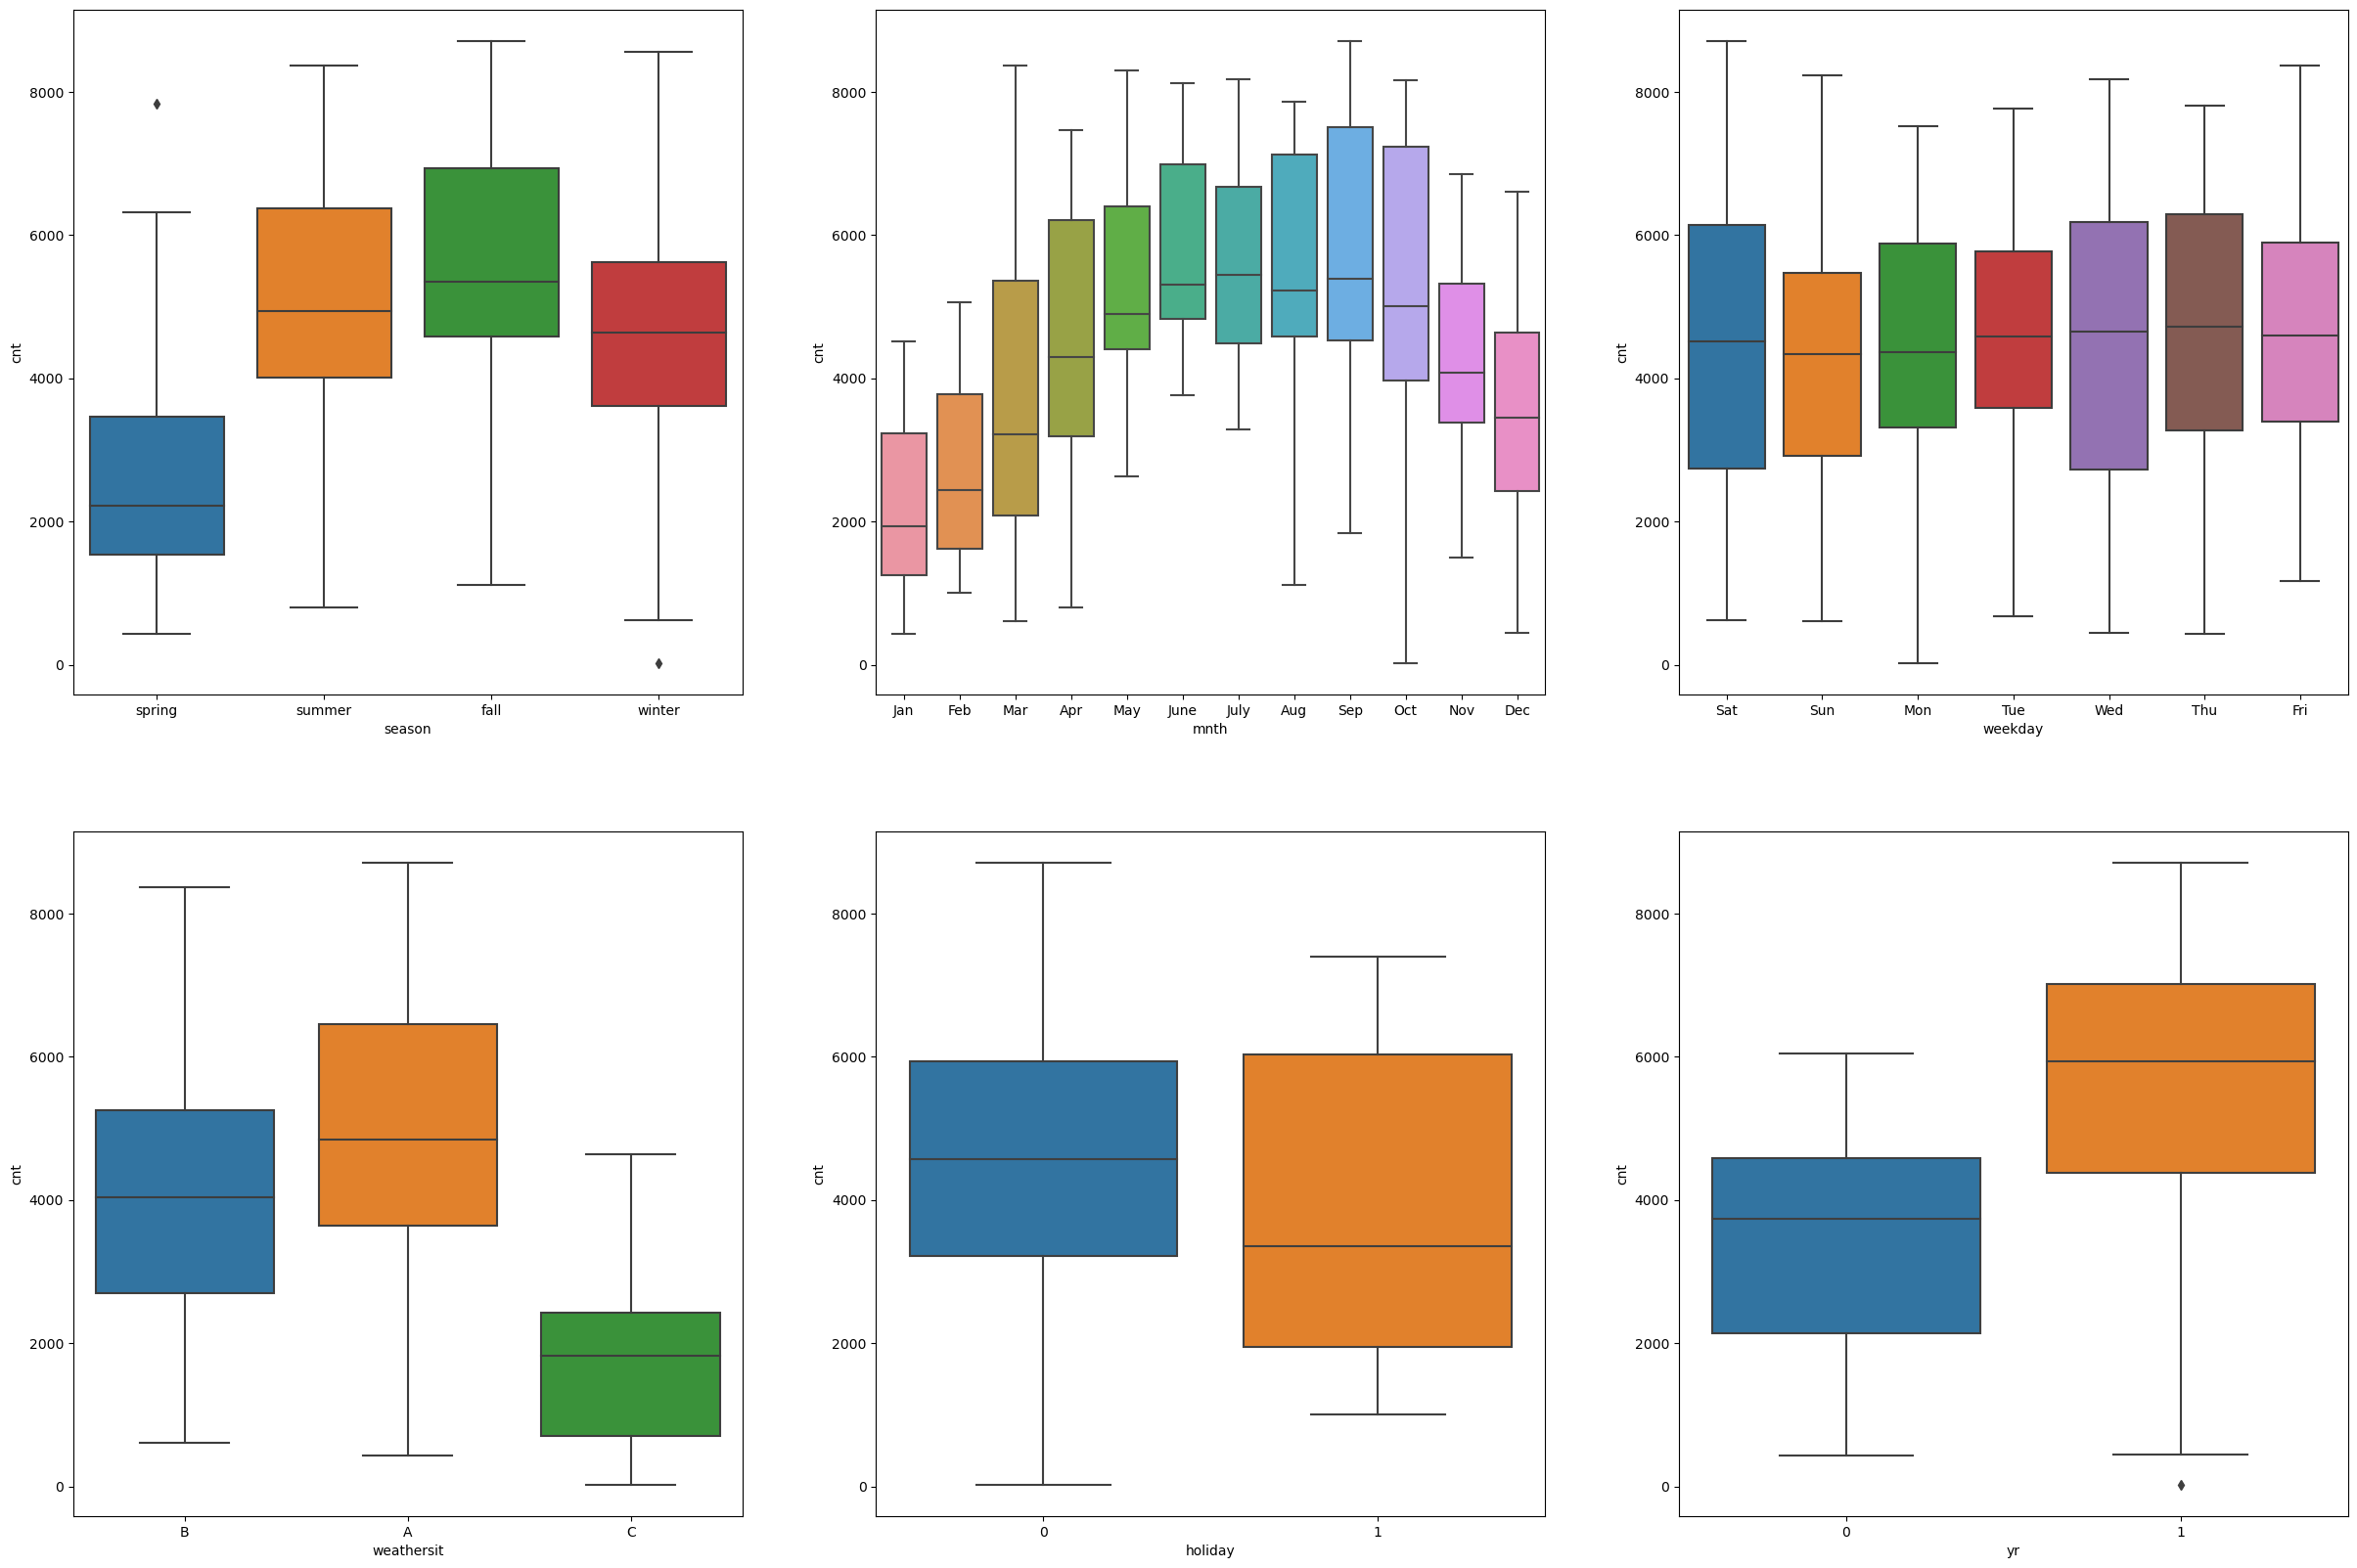

In [28]:
plt.figure(figsize=(30,20))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(2, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(2, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(2, 3, 5)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(2, 3, 6)
sns.boxplot(x='yr', y='cnt', data=df)

In [29]:
int_var = ['casual', 'registered', 'cnt']
for var in int_var:
    df[int_var] = df[int_var].astype('float')

In [30]:
num_var = df.select_dtypes(include=['float'])
num_var

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0


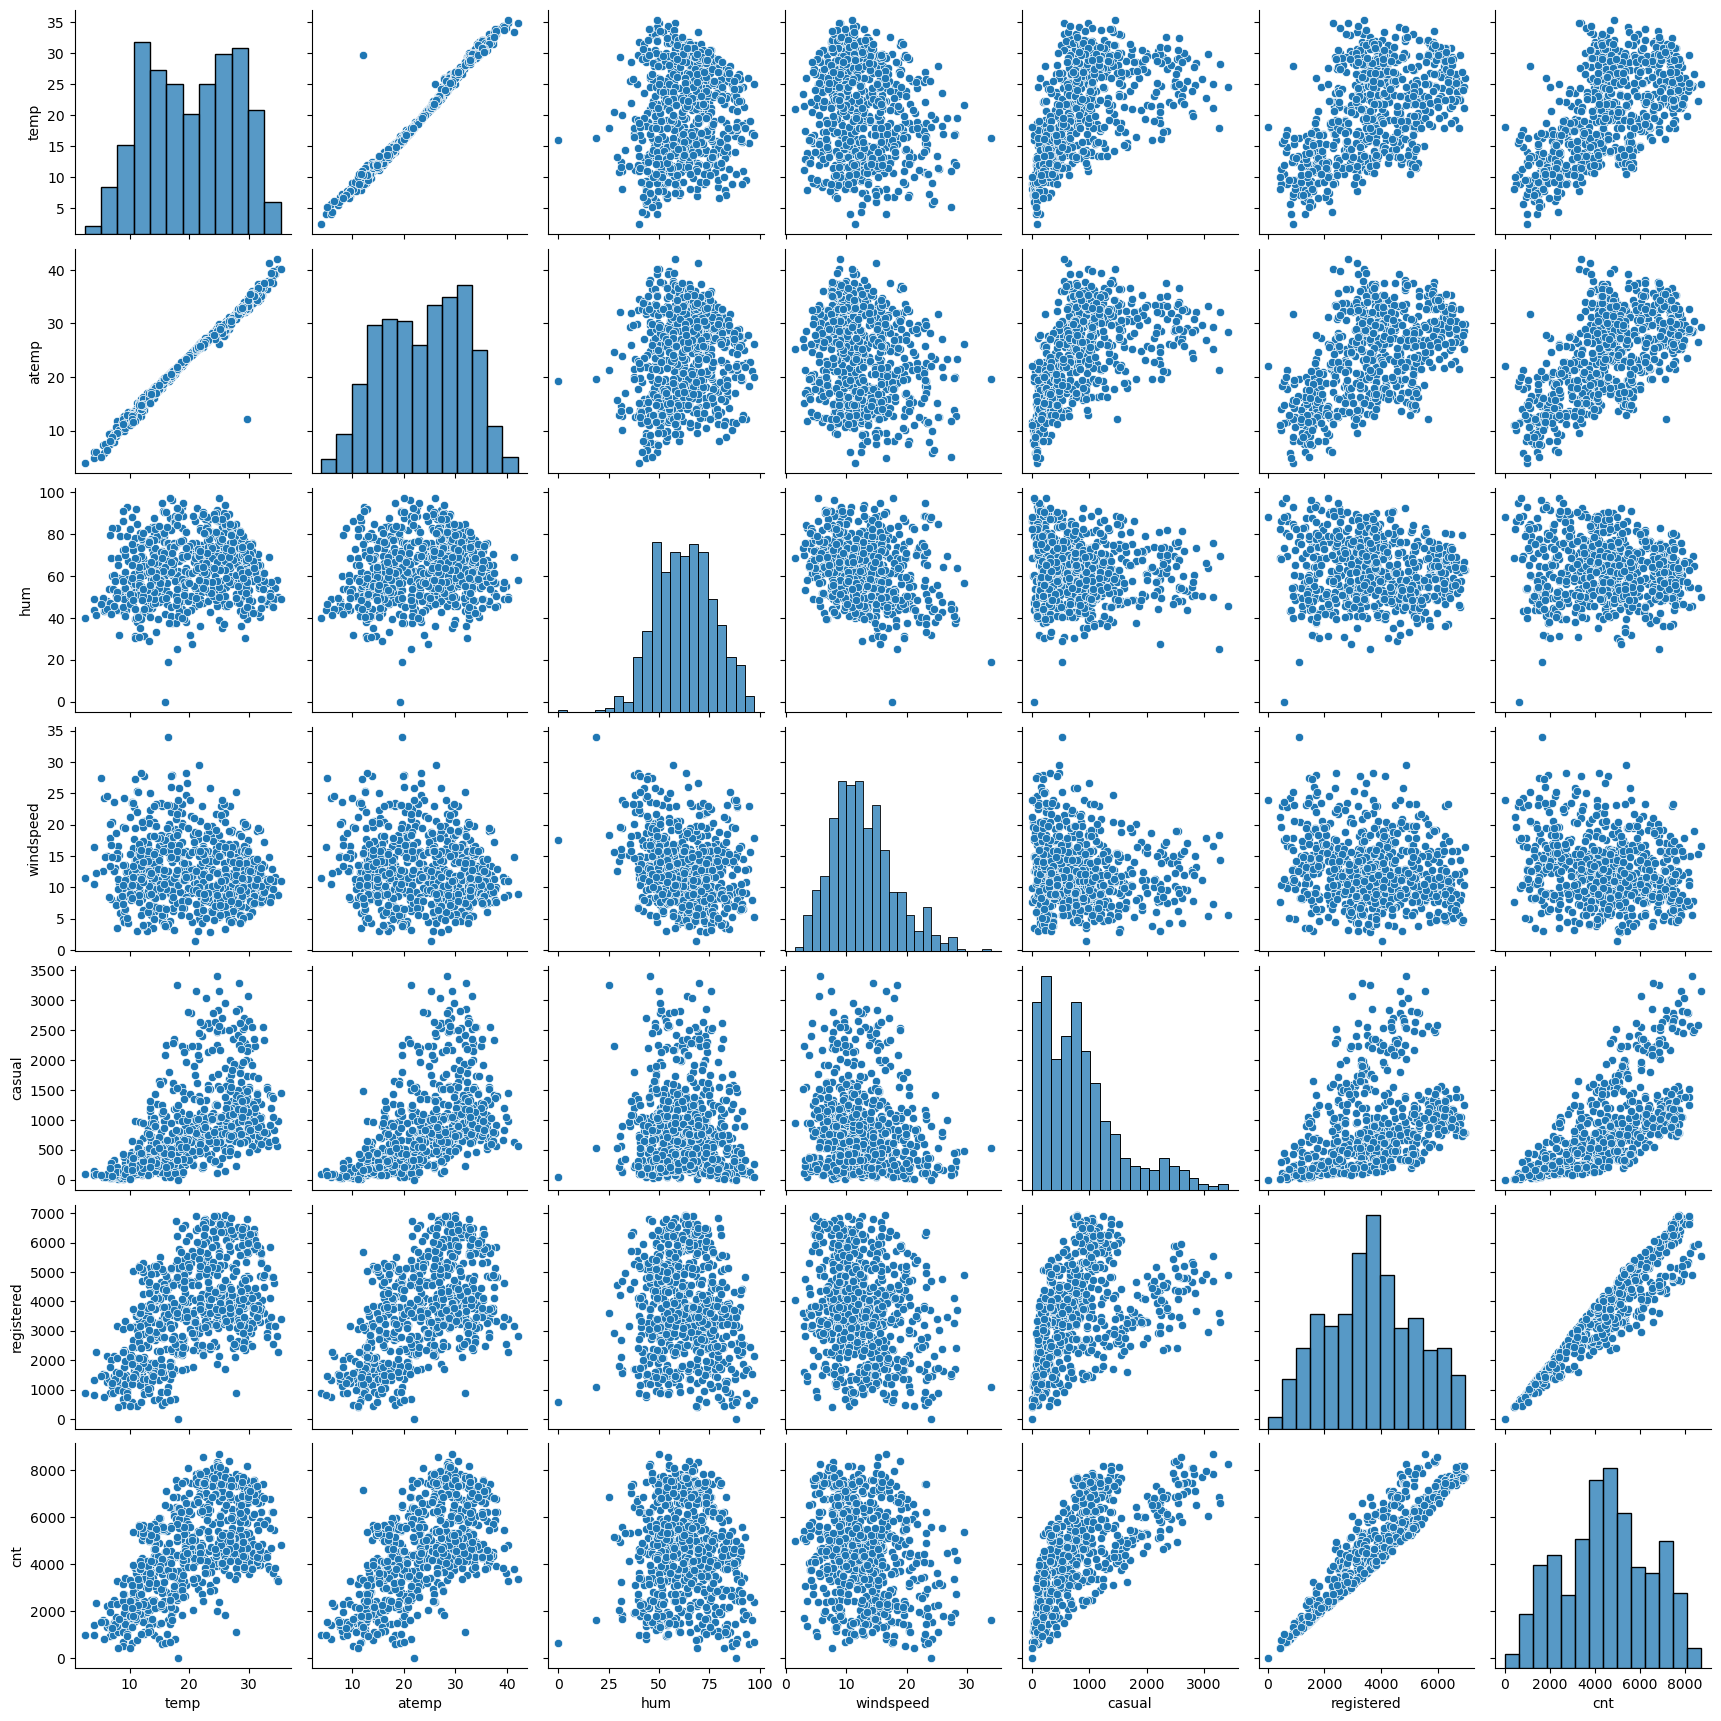

In [31]:
sns.pairplot(num_var)
plt.show()

In [32]:
num_var.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


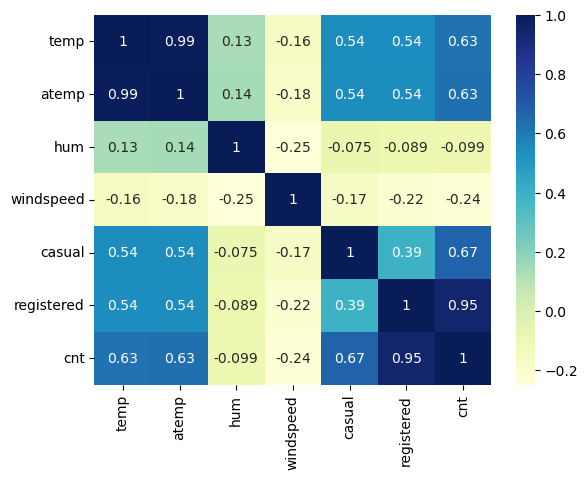

In [33]:
sns.heatmap(num_var.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [34]:
#since there is high correlation between temp and atemp, we need to drop atemp
df = df.drop('atemp', axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    float64
 10  registered  730 non-null    float64
 11  cnt         730 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 68.6+ KB


In [36]:
df_cat_vars = df.select_dtypes(include='object')
df_cat_vars

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thu,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


In [37]:
dum_vars = pd.get_dummies(df_cat_vars, drop_first=True)


In [38]:
dum_vars.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
df = df.drop(list(df_cat_vars), axis=1)
df.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt
0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,0,0,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,0,0,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,0,0,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [40]:
df = pd.concat([df,dum_vars], axis=1)
df.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Train Test split

In [41]:
df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)


In [42]:
df_train.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
576,1,0,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,13.803347,72.9583,14.707907,177.0,1506.0,1683.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [43]:
df_train.shape

(510, 30)

In [44]:
df_test.shape

(220, 30)

#### Scaling

In [45]:
scaler = MinMaxScaler()

In [46]:
df_train.dtypes

yr                 int64
holiday            int64
temp             float64
hum              float64
windspeed        float64
casual           float64
registered       float64
cnt              float64
season_spring      uint8
season_summer      uint8
season_winter      uint8
mnth_Aug           uint8
mnth_Dec           uint8
mnth_Feb           uint8
mnth_Jan           uint8
mnth_July          uint8
mnth_June          uint8
mnth_Mar           uint8
mnth_May           uint8
mnth_Nov           uint8
mnth_Oct           uint8
mnth_Sep           uint8
weekday_Mon        uint8
weekday_Sat        uint8
weekday_Sun        uint8
weekday_Thu        uint8
weekday_Tue        uint8
weekday_Wed        uint8
weathersit_B       uint8
weathersit_C       uint8
dtype: object

In [47]:
num_vars = df_train.select_dtypes(include=['float']).columns


In [48]:
num_vars

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [49]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
df_train[num_vars].head()

,temp,hum,windspeed,casual,registered,cnt
576,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973
111,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095


In [51]:
df_train.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
576,1,0,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
df_train.corr()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
yr,1.000000,-0.014980,0.108054,-0.084061,-0.000439,0.258239,0.620329,0.591433,-0.036320,0.018294,-0.027174,0.054774,-0.040049,-1.991603e-02,-1.179424e-02,0.017623,0.017623,-0.005172,-0.025933,-0.018790,-0.025933,0.002574,0.053634,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452,-0.011388,-6.076399e-02
holiday,-0.014980,1.000000,-0.066405,-0.029224,0.017458,-0.008534,-0.114921,-0.095948,0.053339,-0.063798,0.051582,-0.052728,-0.004302,5.652428e-02,3.741163e-02,-0.046539,-0.046539,-0.053321,-0.049076,0.127543,-0.004302,0.043692,0.279279,-0.069242,-0.066102,9.759407e-03,-0.062897,-0.070276,-0.038895,-2.815377e-02
temp,0.108054,-0.066405,1.000000,0.155252,-0.187281,0.555900,0.559120,0.645048,-0.606396,0.126057,-0.234200,0.387176,-0.273091,-2.962130e-01,-4.469406e-01,0.413678,0.301219,-0.179941,0.155168,-0.194994,-0.018286,0.207212,-0.032455,-0.042608,-0.017367,2.518482e-03,0.048662,0.029020,-0.089452,-3.622709e-02
hum,-0.084061,-0.029224,0.155252,1.000000,-0.267126,-0.044337,-0.053672,-0.058793,-0.201616,-0.014192,0.173980,0.052949,0.057615,-1.297797e-01,-7.190640e-02,-0.054070,-0.095077,-0.111040,0.145409,0.004676,0.167153,0.152439,0.022296,-0.040858,0.011915,-3.853025e-02,0.012087,0.046866,0.479436,2.449653e-01
windspeed,-0.000439,0.017458,-0.187281,-0.267126,1.000000,-0.183800,-0.234004,-0.253038,0.180351,0.110441,-0.090740,-0.111460,-0.061179,1.329361e-01,6.581662e-03,-0.085671,-0.033103,0.141944,-0.034342,0.009742,-0.018546,-0.121930,-0.004658,0.049063,-0.001499,-4.619727e-03,-0.004101,-0.019862,-0.029892,8.677832e-02
casual,0.258239,-0.008534,0.555900,-0.044337,-0.183800,1.000000,0.401548,0.671434,-0.418820,0.195409,-0.093734,0.174360,-0.206322,-2.342395e-01,-3.014849e-01,0.166041,0.178508,-0.061338,0.109809,-0.112446,0.069408,0.137678,-0.129234,0.358648,0.306143,-1.514144e-01,-0.146122,-0.187994,-0.153744,-1.586688e-01
registered,0.620329,-0.114921,0.559120,-0.053672,-0.234004,0.401548,1.000000,0.948308,-0.499106,0.089656,0.072204,0.206583,-0.089044,-2.338001e-01,-3.384061e-01,0.124266,0.165054,-0.143618,0.092967,-0.011169,0.038938,0.190235,0.043809,-0.173358,-0.209225,7.711057e-02,0.100303,0.111980,-0.143901,-2.121905e-01
cnt,0.591433,-0.095948,0.645048,-0.058793,-0.253038,0.671434,0.948308,1.000000,-0.548987,0.140259,0.025945,0.227578,-0.143546,-2.703505e-01,-3.782957e-01,0.158087,0.195411,-0.137465,0.113276,-0.048002,0.055558,0.201639,-0.009333,-0.015998,-0.063214,9.927716e-03,0.030528,0.025468,-0.169715,-2.266784e-01
season_spring,-0.036320,0.053339,-0.606396,-0.201616,0.180351,-0.418820,-0.499106,-0.548987,1.000000,-0.324666,-0.324666,-0.184784,0.041868,4.715403e-01,5.488613e-01,-0.163094,-0.163094,0.305009,-0.171986,-0.174161,-0.171986,-0.167580,-0.009212,0.022641,0.003276,6.274901e-03,-0.030988,-0.008680,0.011613,-4.455809e-02
season_summer,0.018294,-0.063798,0.126057,-0.014192,0.110441,0.195409,0.089656,0.140259,-0.324666,1.000000,-0.328125,-0.186753,-0.173818,-1.530931e-01,-1.781966e-01,-0.164832,0.262846,0.086333,0.529732,-0.176016,-0.173818,-0.169366,-0.000299,-0.019069,-0.013439,-2.407278e-02,0.032932,0.037167,0.043202,-4.590079e-02


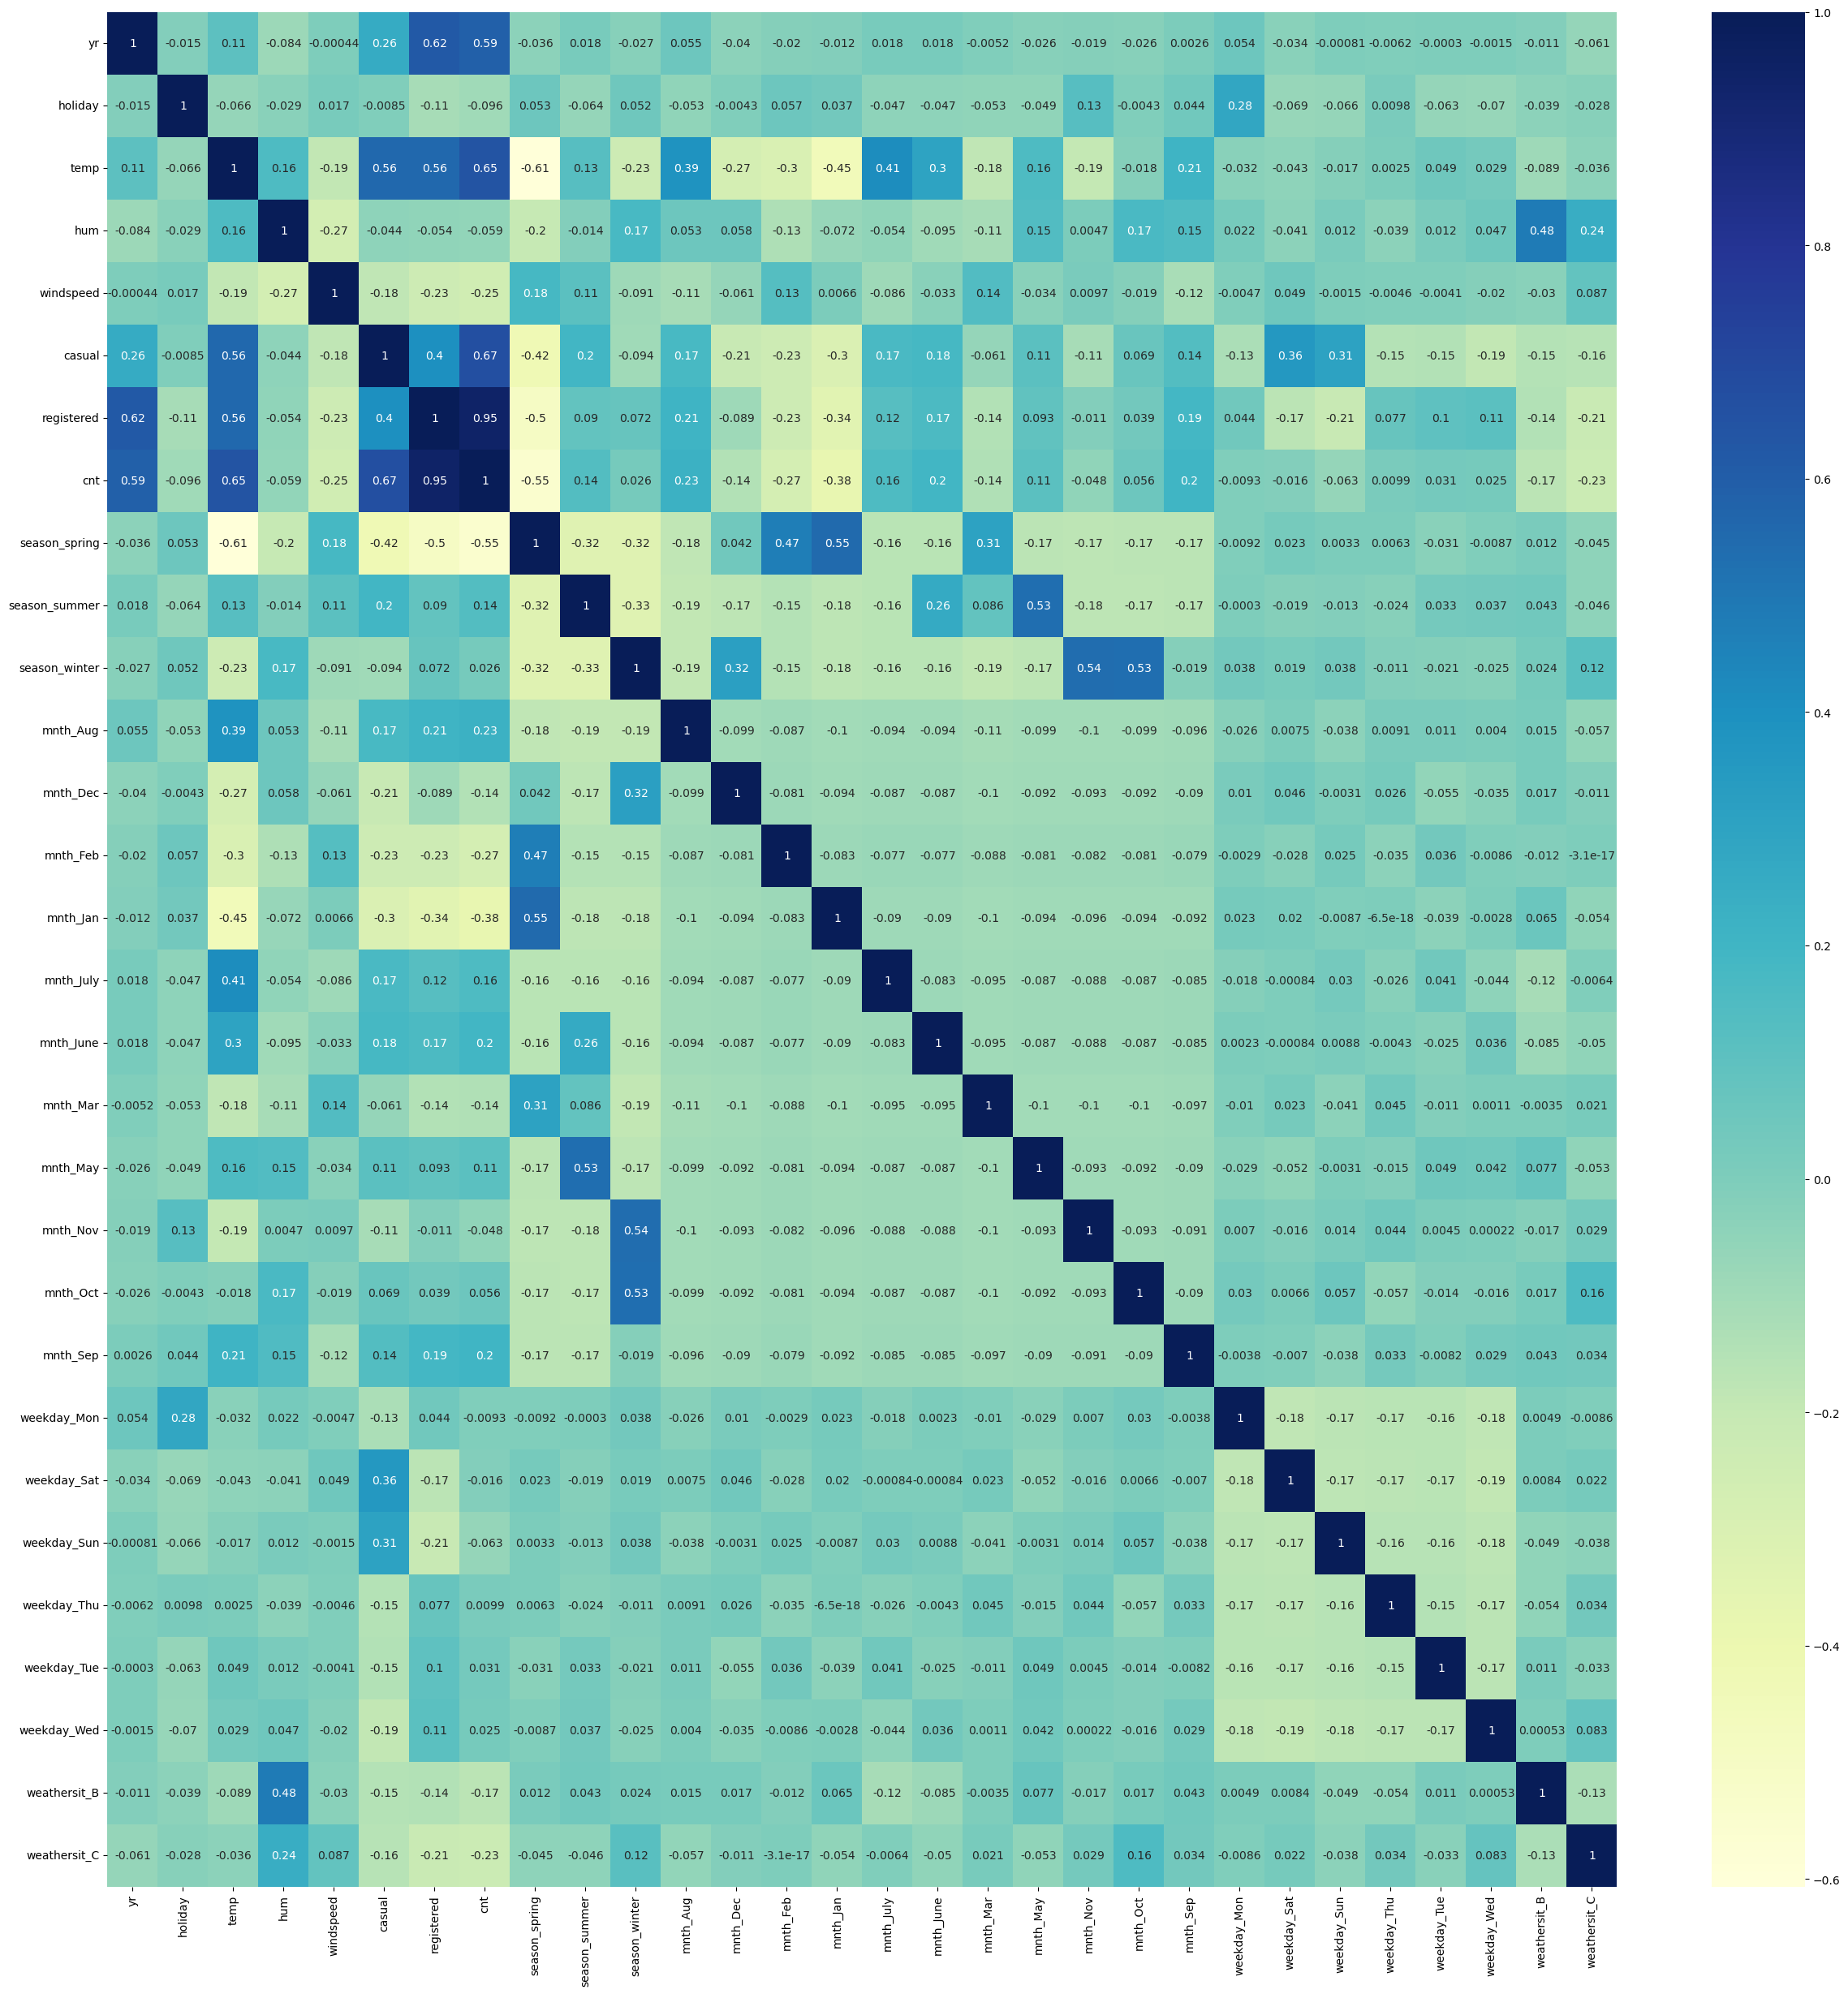

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

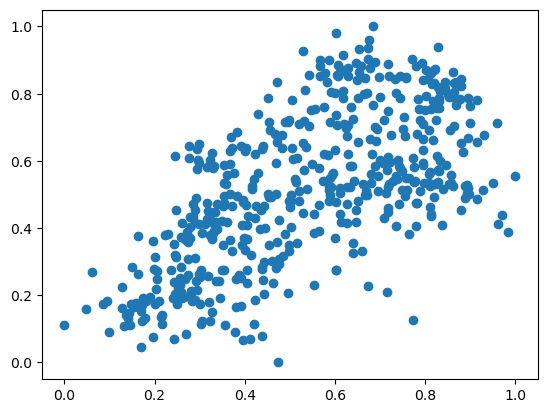

In [54]:
plt.scatter(df_train['temp'], df_train['cnt'])
plt.show()

In [55]:
df_train = df_train.drop(['casual', 'registered'], axis=1)

In [56]:
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1.        , 0.        , 0.81516855, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.44239303, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.2451011 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.24821622, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.46266376, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.60022509, ..., 0.        , 1.        ,
        0.        ]])

In [58]:
y_train = df_train.pop('cnt')
X_train = df_train

In [59]:
print(y_train.shape)
print(y_train.head())

(510,)
576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64


In [60]:
print(X_train.shape)
X_train.head()

(510, 27)


,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Building the first model with all the features

In [61]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params

const            0.339283
yr               0.232438
holiday         -0.086134
temp             0.445359
hum             -0.151473
windspeed       -0.186010
season_spring   -0.044834
season_summer    0.043002
season_winter    0.107632
mnth_Aug         0.020376
mnth_Dec        -0.044277
mnth_Feb        -0.032441
mnth_Jan        -0.063315
mnth_July       -0.033848
mnth_June        0.004602
mnth_Mar         0.001274
mnth_May         0.024673
mnth_Nov        -0.039879
mnth_Oct         0.007546
mnth_Sep         0.085938
weekday_Mon     -0.020931
weekday_Sat     -0.000623
weekday_Sun     -0.054843
weekday_Thu     -0.009131
weekday_Tue     -0.017931
weekday_Wed     -0.005495
weathersit_B    -0.059551
weathersit_C    -0.255835
dtype: float64

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          3.00e-181
Time:                        21:14:35   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3393      0.044      7.694      0.000       0.253       0.426
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday          -0.0861      0.027     -3.234      0.001      -0.138      -0.034
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring    -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer     0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter     0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug          0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec         -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb         -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan         -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July        -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June         0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar          0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May          0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov         -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct          0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sep          0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon      -0.0209      0.015     -1.365      0.173      -0.051       0.009
weekday_Sat      -0.0006      0.015     -0.042      0.967      -0.030       0.029
weekday_Sun      -0.0548      0.015     -3.588      0.000      -0.085      -0.025
weekday_Thu      -0.0091      0.016     -0.588      0.557      -0.040       0.021
weekday_Tue      -0.0179      0.016     -1.156      0.248      -0.048       0.013
weekday_Wed      -0.0055      0.015     -0.368      0.713      -0.035       0.024
weathersit_B     -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_C     -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [65]:
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15)
rfe1 = rfe1.fit(X_train, y_train)
rfe1.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True])

In [66]:
list(zip(X_train, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 8),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [67]:
col = X_train.columns[rfe1.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sun', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [68]:
X_train.columns[~rfe1.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [69]:
X_train_rfe1 = X_train[col]
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weekday_Sun,weathersit_B,weathersit_C
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1,0


In [70]:
lm = sm.OLS(y_train, X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          2.44e-191
Time:                        21:14:35   Log-Likelihood:                 520.21
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3047      0.035      8.770

In [71]:
a = X_train_rfe1.drop('const', axis=1)


In [72]:
a.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weekday_Sun,weathersit_B,weathersit_C
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1,0


In [73]:
vif = pd.DataFrame()
X = a
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.32
2,temp,16.81
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.80
13,weathersit_B,2.31
0,yr,2.09
8,mnth_Jan,1.67
10,mnth_Nov,1.60


In [74]:
lr = LinearRegression()
rfe2 = RFE(lr, n_features_to_select=7)
rfe2 = rfe2.fit(X_train,y_train)

In [75]:
col = X_train.columns[rfe2.support_]
col 

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_winter',
       'weathersit_C'],
      dtype='object')

In [76]:
X_train_rfe2 = X_train[col]

In [77]:
lm3 = sm.OLS(y_train, (sm.add_constant(X_train_rfe2))).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     281.5
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          2.78e-169
Time:                        21:14:35   Log-Likelihood:                 445.46
No. Observations:                 510   AIC:                            -874.9
Df Residuals:                     502   BIC:                            -841.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2575      0.028      9.038      0.000       0.202       0.314
yr                0.2270      0.009     24.865      0.000       0.209       0.245
holiday          -0.0914      0.029     -3.184      0.002      -0.148      -0.035
temp              0.6263      0.022     29.115      0.000       0.584       0.669
hum              -0.2398      0.034     -6.989      0.000      -0.307      -0.172
windspeed        -0.1878      0.028     -6.614      0.000      -0.244      -0.132
season_winter     0.1155      0.011     10.394      0.000       0.094       0.137
weathersit_C     -0.1991      0.028     -7.101      0.000      -0.254      -0.144
==============================================================================
Omnibus:                       39.971   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.012
Skew:                          -0.499   Prob(JB):                     1.40e-16
Kurtosis:                       4.562   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.80
2,temp,6.87
4,windspeed,3.42
0,yr,2.01
5,season_winter,1.48
6,weathersit_C,1.08
1,holiday,1.03


In [79]:
X_train_rfe2.drop('hum', axis=1,inplace=True)

In [80]:
X_train_rfe2.head()

,yr,holiday,temp,windspeed,season_winter,weathersit_C
576,1,0,0.815169,0.264686,0,0
426,1,0,0.442393,0.255342,0,0
728,1,0,0.245101,0.663106,0,0
482,1,0,0.395666,0.188475,0,0
111,0,0,0.345824,0.380981,0,0


In [81]:
lm3 = sm.OLS(y_train, (sm.add_constant(X_train_rfe2))).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     292.4
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          1.93e-160
Time:                        21:14:35   Log-Likelihood:                 421.78
No. Observations:                 510   AIC:                            -829.6
Df Residuals:                     503   BIC:                            -799.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.018      5.481      0.000       0.065       0.137
yr                0.2328      0.010     24.467      0.000       0.214       0.251
holiday          -0.0877      0.030     -2.920      0.004      -0.147      -0.029
temp              0.6009      0.022     27.083      0.000       0.557       0.644
windspeed        -0.1377      0.029     -4.790      0.000      -0.194      -0.081
season_winter     0.1025      0.011      8.941      0.000       0.080       0.125
weathersit_C     -0.2504      0.028     -8.841      0.000      -0.306      -0.195
==============================================================================
Omnibus:                       38.009   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.470
Skew:                          -0.513   Prob(JB):                     2.72e-14
Kurtosis:                       4.374   Cond. No.                         9.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.07
3,windspeed,2.81
0,yr,2.00
4,season_winter,1.24
5,weathersit_C,1.06
1,holiday,1.03


In [83]:
X_train_rfe2.head()

,yr,holiday,temp,windspeed,season_winter,weathersit_C
576,1,0,0.815169,0.264686,0,0
426,1,0,0.442393,0.255342,0,0
728,1,0,0.245101,0.663106,0,0
482,1,0,0.395666,0.188475,0,0
111,0,0,0.345824,0.380981,0,0


In [85]:
y_train_cnt = lm3.predict(sm.add_constant(X_train_rfe2))

Text(0.5, 0, 'Errors')

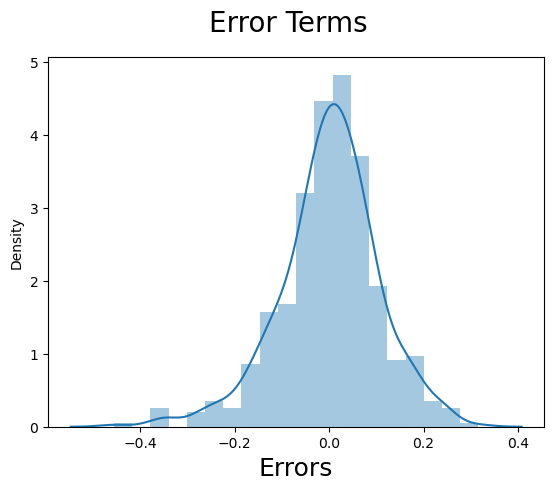

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)           

#### Making prediction

X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

In [92]:
c=X_train_rfe2.drop('const',axis=1)

In [88]:
num_vars

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [89]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,temp,hum,windspeed,casual,registered,cnt
184,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706
535,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034
299,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382
221,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400
152,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029


In [90]:
y_test = df_test.pop('cnt')
X_test = df_test
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [91]:
X_test.head()

,yr,holiday,temp,hum,windspeed,casual,registered,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0.831783,0.657364,0.084219,0.933557,0.427086,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,0.901354,0.610133,0.153728,0.265163,0.767976,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0.072539,0.346376,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,0.881625,0.437098,0.339570,0.268820,0.559630,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,0.817246,0.314298,0.537414,0.223712,0.608143,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [93]:
col2 = c.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_winter', 'weathersit_C'], dtype='object')

In [94]:
X_test_rfe2 = X_test[col2]


In [95]:
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   yr             220 non-null    int64  
 2   holiday        220 non-null    int64  
 3   temp           220 non-null    float64
 4   windspeed      220 non-null    float64
 5   season_winter  220 non-null    uint8  
 6   weathersit_C   220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 10.7 KB


In [96]:
y_test_pred = lm3.predict(X_test_rfe2)


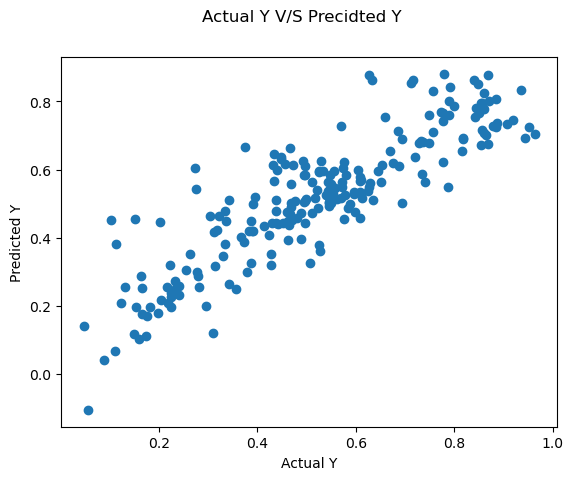

In [98]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual Y V/S Precidted Y')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

In [99]:
r2_score(y_test,y_test_pred)

0.7518412352015953

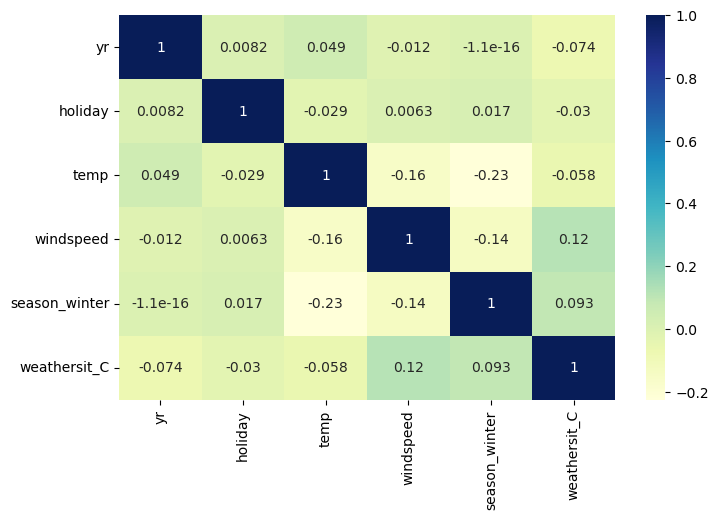

In [102]:
plt.figure(figsize=(8,5))
sns.heatmap(df[col2].corr(), annot=True, cmap='YlGnBu')
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.
